# <span style='color:red'> Fully Connected Neural Network Example on Iris Classification - MSE Loss </span>
# <span style='color:blue'> by Jimin Kim </span>

In [222]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch

In [223]:
from IPython.display import Image # For displaying images in colab jupyter cell

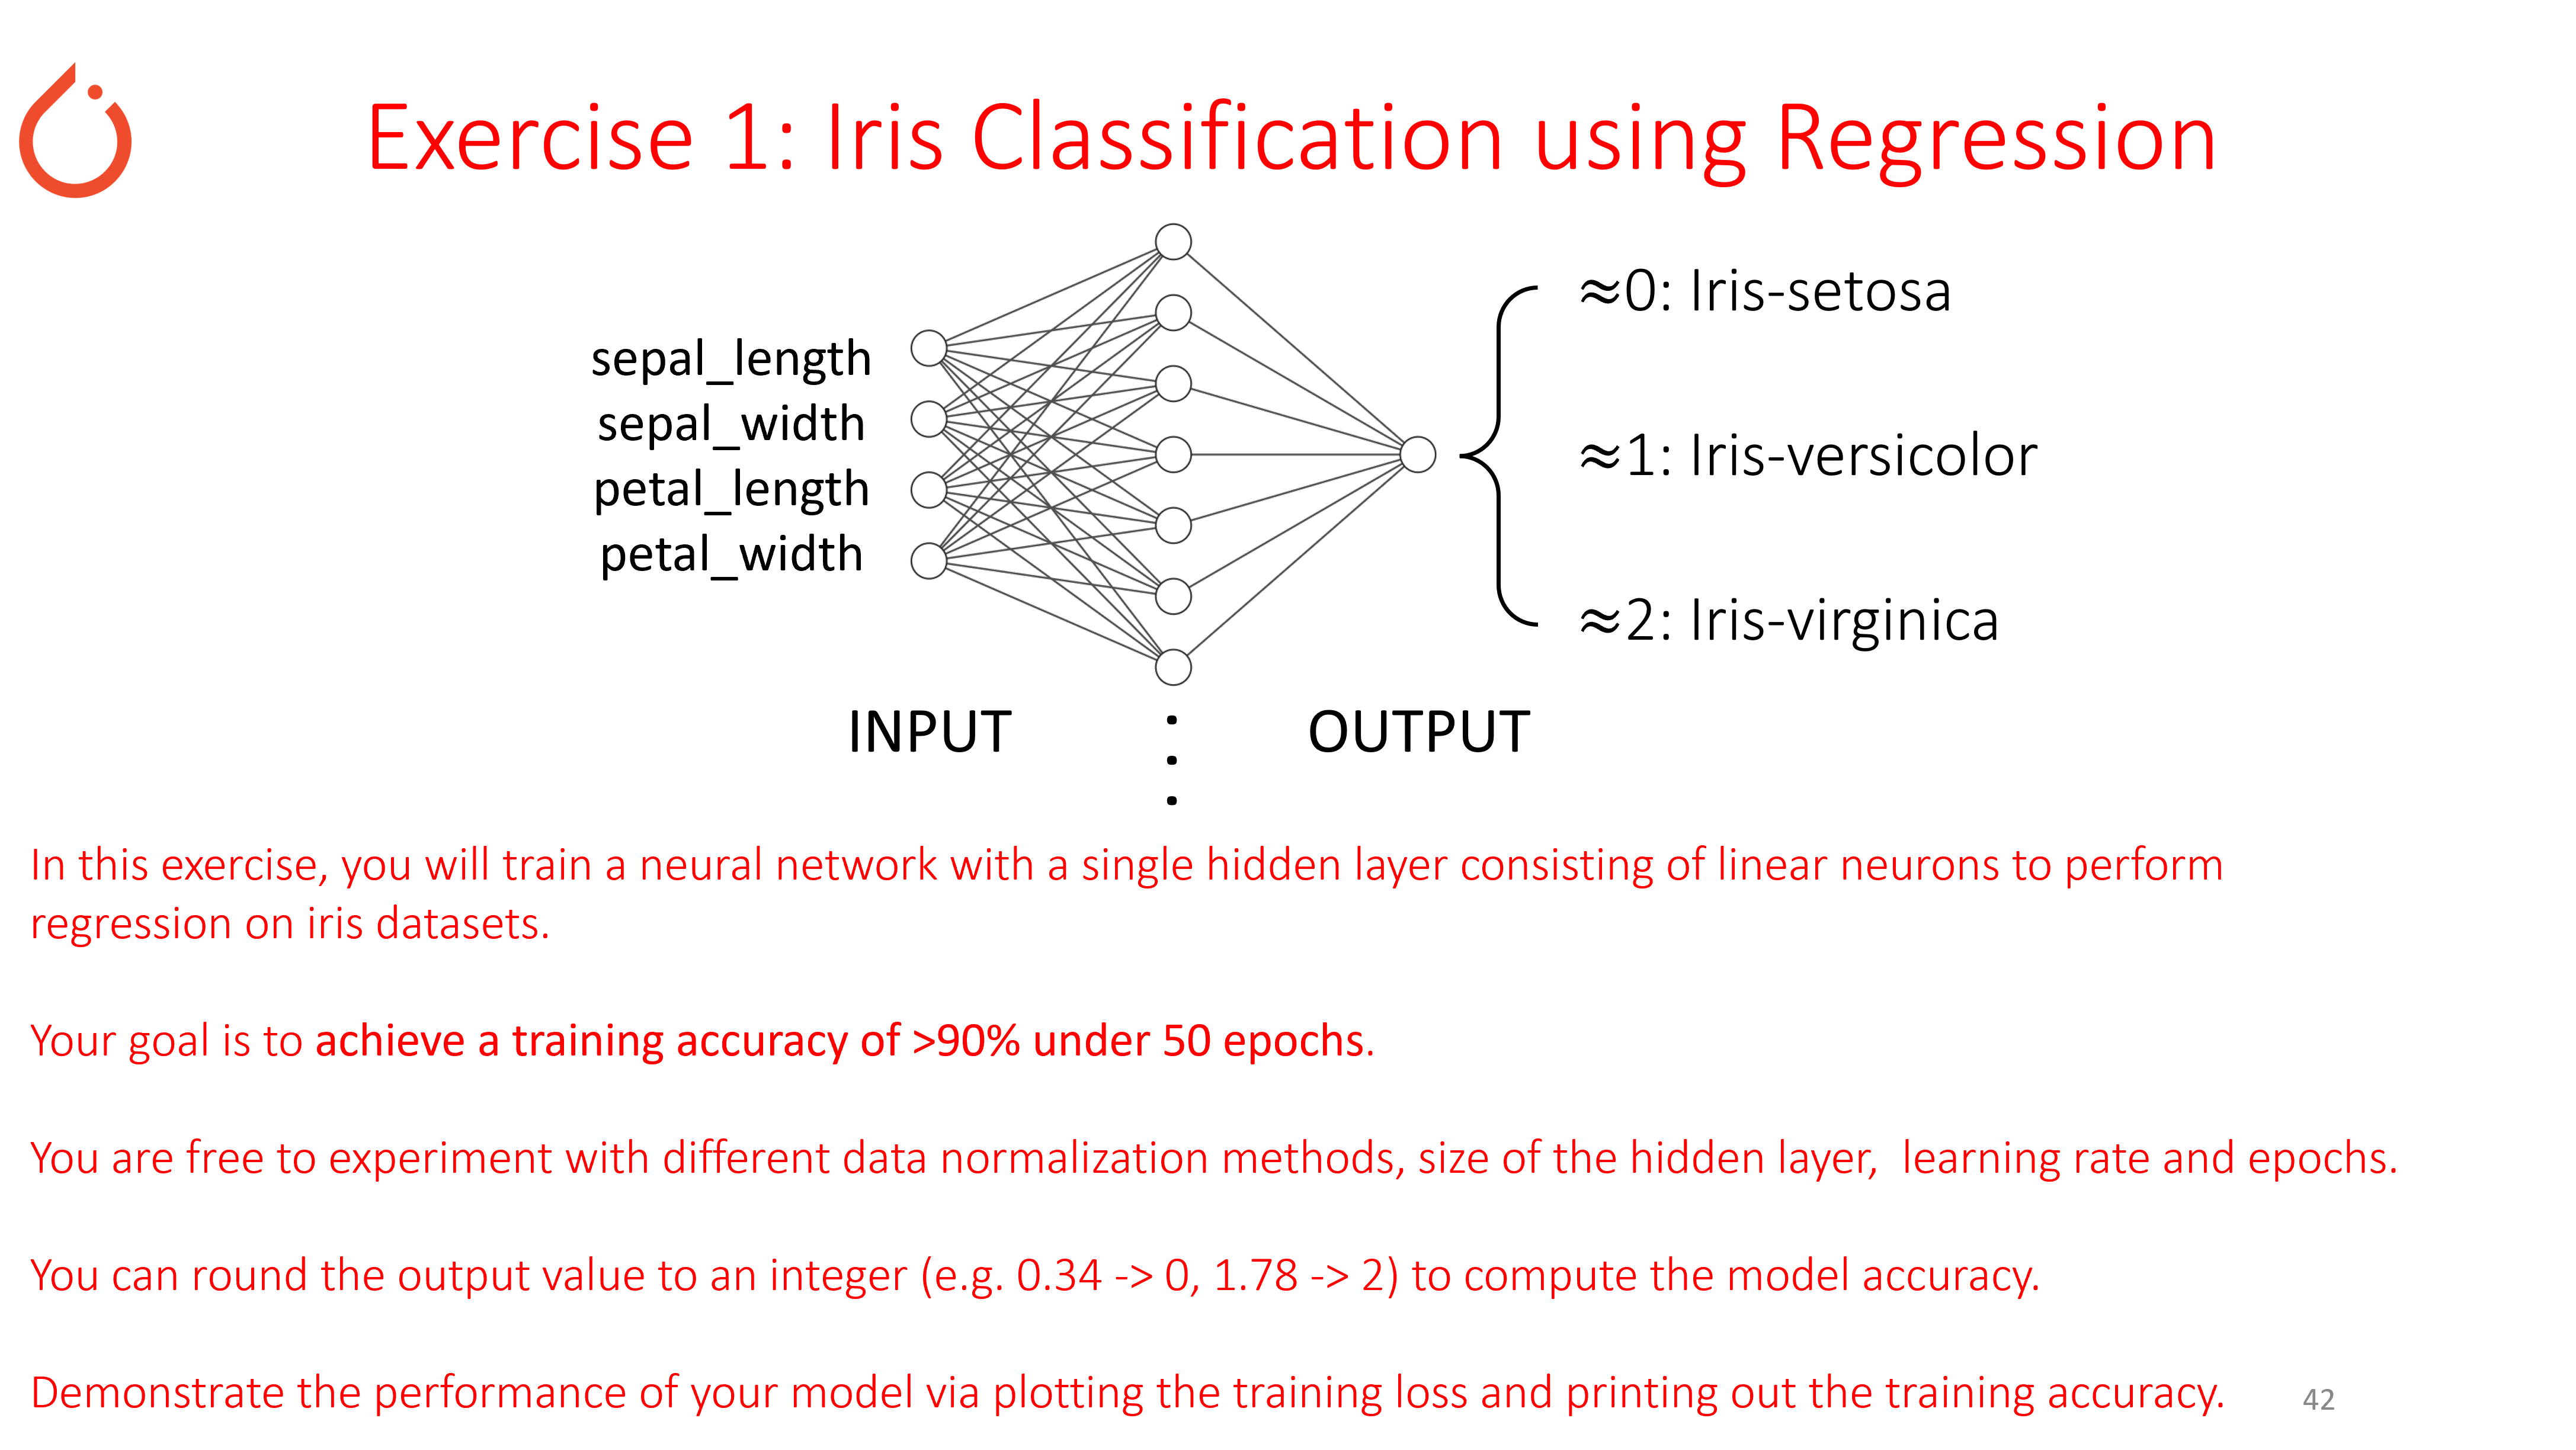

In [224]:
Image('iris_exercise1.PNG', width = 1000)

## Prepare the Data

In [225]:
from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

In [226]:
# Print the first 10 training samples for both features and targets

print(X_train[:10, :], y_train[:10]) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]


In [227]:
# Print the dimensions of features and targets

print(X_train.shape, y_train.shape)

(150, 4) (150,)


In [228]:
# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica

print(feature_names, names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


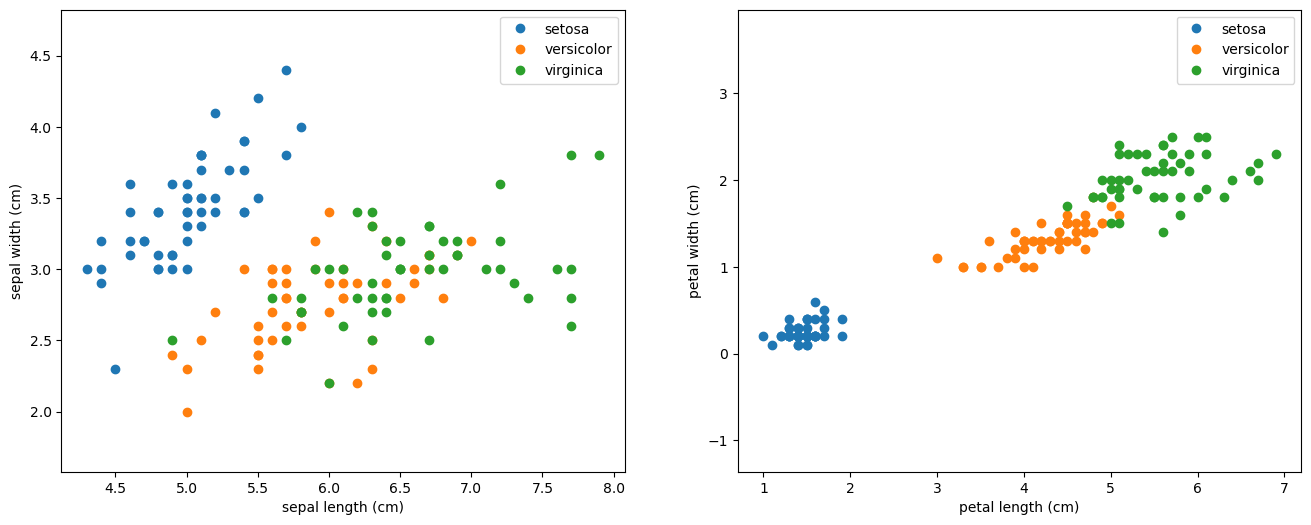

In [229]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):
    
    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[y_train == target]
    
    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):
    
    X_plot = X_train[y_train == target]
    
    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
    
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

## Define Model

In [230]:
class irisClassification(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim):
        
        super(irisClassification, self).__init__()
        
        self.layer1 = torch.nn.Linear(input_dim, 5) # Middle layer has 5 neurons
        self.layer2 = torch.nn.Linear(5, output_dim)
        
    def forward(self, x):
        
        x = self.layer1(x)
        x = self.layer2(x)
        
        return x

## Define Hyperparameters

In [231]:
model = irisClassification(4, 1)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.95, 0.99))

loss_fn = torch.nn.MSELoss()

epochs  = 50

## Identify Tracked Values

In [232]:
training_loss_list = np.zeros((epochs,))

## Train Model

In [233]:
import tqdm

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

for epoch in tqdm.trange(epochs):
    
    y_pred = model(X_train)
    
    loss = loss_fn(y_pred.reshape(len(y_pred)), y_train)
    
    training_loss_list[epoch] = loss.item()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

100%|██████████| 50/50 [00:00<00:00, 1267.86it/s]


## Visualize and Evaluate Model

Text(0, 0.5, 'Training accuracy')

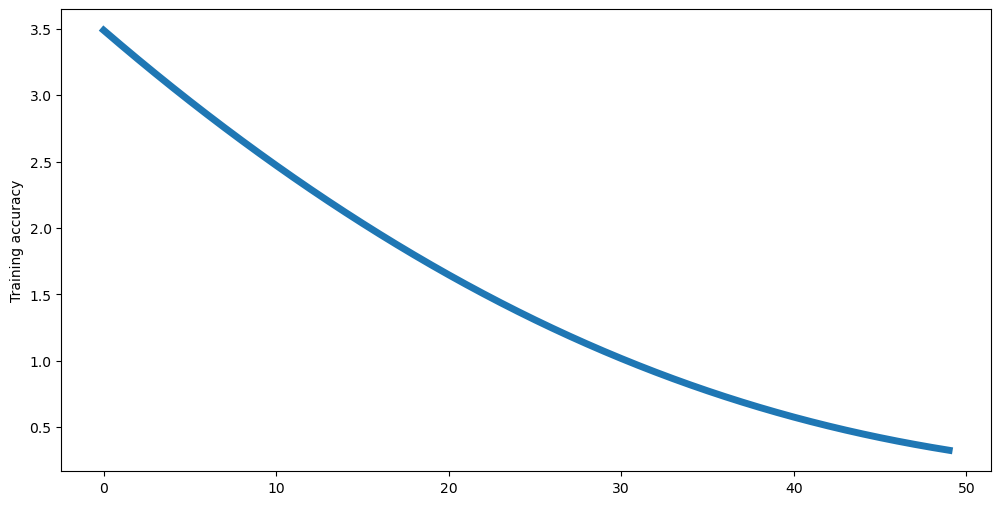

In [234]:
plt.figure(figsize=(12, 6))

plt.plot(training_loss_list, linewidth = 5)
plt.ylabel("Training accuracy")


In [235]:
with torch.no_grad():    
    predicted = model(X_train).numpy()
    
    
training_accuracy = np.sum(np.ndarray.flatten(np.round(predicted)) == y_train.numpy()) / len(X_train)
print(training_accuracy)





0.6666666666666666
